## Data cleanup

In [51]:
import pandas as pd

In [52]:
splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/ailsntua/QEvasion/" + splits["train"])

In [53]:
df.sample(3)

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,annotator_id,annotator1,annotator2,annotator3,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
2540,The President's News Conference,"November 03, 2010",Barack Obama,https://www.presidency.ucsb.edu/documents/the-...,2,Q. Just following up on what Ben just talked a...,"Well, Savannah, that was just the first questi...",The question consists of 1 part:\n\n1. Is it p...,Question part: 1. Is it possible voters can co...,Is it possible voters can conclude you're sti...,89,None,None,None,False,False,False,2540,Ambivalent,Implicit
962,"The President's News Conference in New Delhi, ...","February 25, 2020",Donald J. Trump,https://www.presidency.ucsb.edu/documents/the-...,15,"Q. Now, back home, when you reflect upon your ...","Well first of all, I'd describe it as incredib...",The question consists of 3 parts:\n\n1. How wo...,Question part: 1. How would you describe your ...,Do you have any other word to describe your to...,89,None,None,None,False,False,False,962,Ambivalent,Dodging
2931,The President's News Conference With President...,"April 01, 2008",George W. Bush,https://www.presidency.ucsb.edu/documents/the-...,5,Q. The question to President Yushchenko: Pleas...,"If not, the—I'm sure that we will win because ...",The question consists of 1 part:\n\n1. The que...,Question part: 1. If the positive decision is ...,"Please, Mr. President, say, if the positive de...",85,None,None,None,False,False,False,2931,Ambivalent,Deflection


In [54]:
# we don't really care about the title, date, source url 
df.drop(columns=['title', 'date', 'url'], axis=1, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   president              3448 non-null   object
 1   question_order         3448 non-null   int64 
 2   interview_question     3448 non-null   object
 3   interview_answer       3448 non-null   object
 4   gpt3.5_summary         3448 non-null   object
 5   gpt3.5_prediction      3448 non-null   object
 6   question               3448 non-null   object
 7   annotator_id           3448 non-null   object
 8   annotator1             0 non-null      object
 9   annotator2             0 non-null      object
 10  annotator3             0 non-null      object
 11  inaudible              3448 non-null   bool  
 12  multiple_questions     3448 non-null   bool  
 13  affirmative_questions  3448 non-null   bool  
 14  index                  3448 non-null   int64 
 15  clarity_label        

In [56]:
# all annotator info is null, so we drop those columns too
df.drop(columns=['annotator1', 'annotator2', 'annotator3', 'annotator_id', 'gpt3.5_summary', 'gpt3.5_prediction'], axis=1, inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   president              3448 non-null   object
 1   question_order         3448 non-null   int64 
 2   interview_question     3448 non-null   object
 3   interview_answer       3448 non-null   object
 4   question               3448 non-null   object
 5   inaudible              3448 non-null   bool  
 6   multiple_questions     3448 non-null   bool  
 7   affirmative_questions  3448 non-null   bool  
 8   index                  3448 non-null   int64 
 9   clarity_label          3448 non-null   object
 10  evasion_label          3448 non-null   object
dtypes: bool(3), int64(2), object(6)
memory usage: 225.7+ KB


In [58]:
df.describe()

,question_order,index
count,3448.000000,3448.000000
mean,7.927204,1723.500000
std,9.262518,995.496191
min,1.000000,0.000000
25%,2.000000,861.750000
50%,5.000000,1723.500000
75%,10.000000,2585.250000
max,73.000000,3447.000000


In [59]:
# we can downcast the numeric columns to save memory, same for the president and clarity and evasion labels

conversion_dict = {
    'president': 'category',
    'clarity_label': 'category',
    'evasion_label': 'category',
    'question_order': 'int8',
    'index': 'int16',
    'interview_question': 'string',
    'interview_answer': 'string',
    'question': 'string',
}

df = df.astype(conversion_dict)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   president              3448 non-null   category
 1   question_order         3448 non-null   int8    
 2   interview_question     3448 non-null   string  
 3   interview_answer       3448 non-null   string  
 4   question               3448 non-null   string  
 5   inaudible              3448 non-null   bool    
 6   multiple_questions     3448 non-null   bool    
 7   affirmative_questions  3448 non-null   bool    
 8   index                  3448 non-null   int16   
 9   clarity_label          3448 non-null   category
 10  evasion_label          3448 non-null   category
dtypes: bool(3), category(3), int16(1), int8(1), string(3)
memory usage: 111.9 KB


100KB memory saved

## Data visualisations

In [83]:

import matplotlib.pyplot as plt
import seaborn as sns

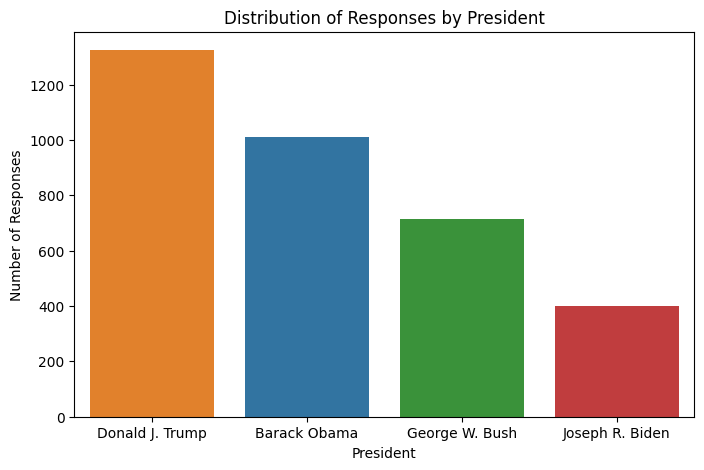

In [84]:
# distribution by president
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='president', hue='president', order=df['president'].value_counts().index)
plt.title('Distribution of Responses by President')
plt.xlabel('President')
plt.ylabel('Number of Responses')
plt.show()

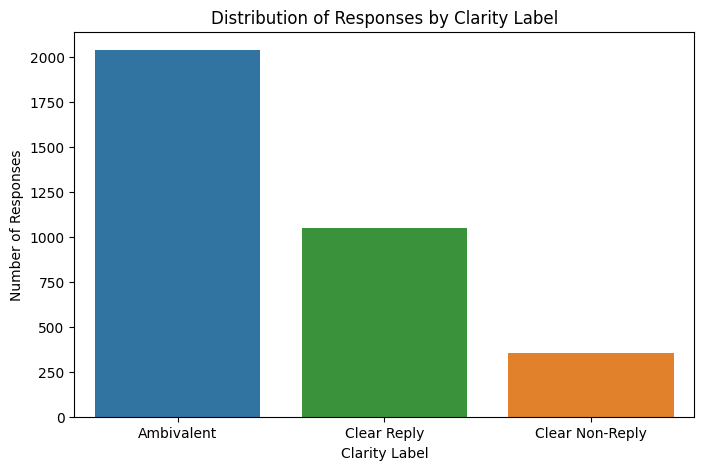

In [85]:
# distribution by clarity label
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='clarity_label', hue='clarity_label', order=df['clarity_label'].value_counts().index)
plt.title('Distribution of Responses by Clarity Label')
plt.xlabel('Clarity Label')
plt.ylabel('Number of Responses')
plt.show()

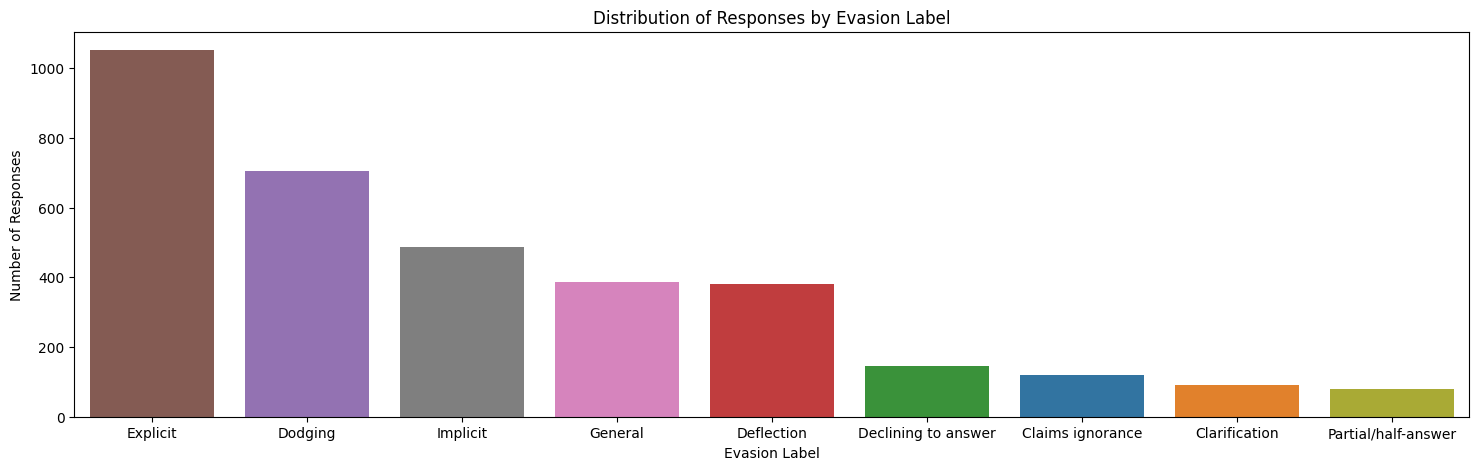

In [86]:
# distribution by evasion label
plt.figure(figsize=(18, 5))
sns.countplot(data=df, x='evasion_label', hue='evasion_label', order=df['evasion_label'].value_counts().index)
plt.title('Distribution of Responses by Evasion Label')
plt.xlabel('Evasion Label')
plt.ylabel('Number of Responses')
plt.show()

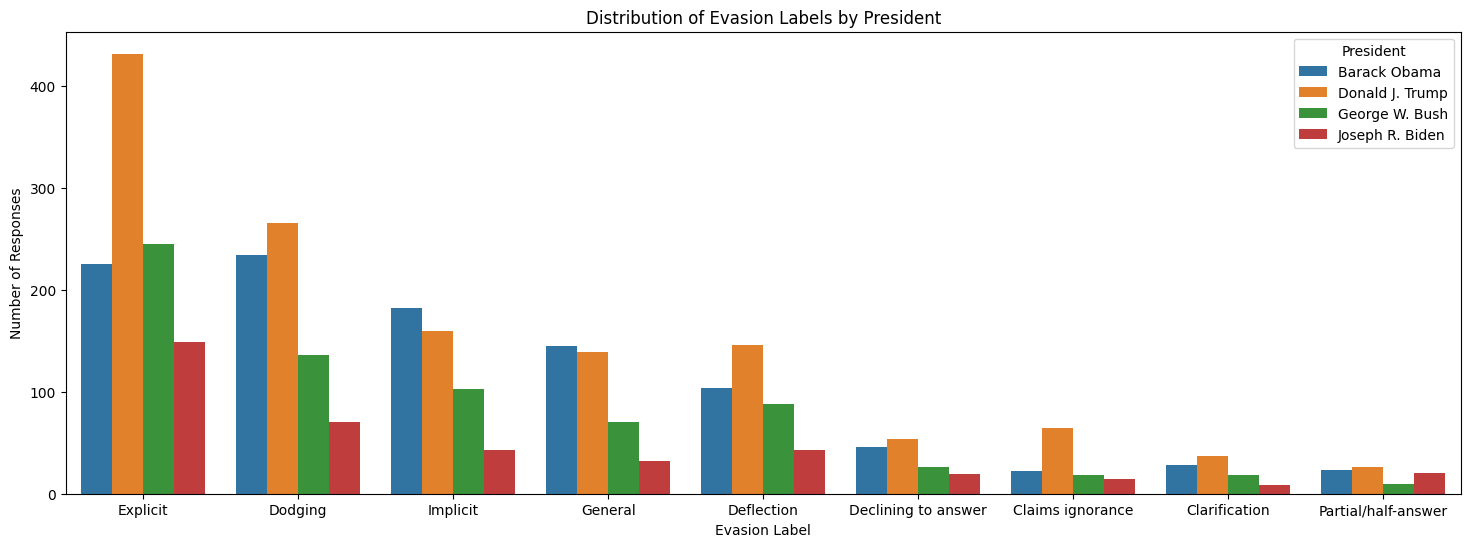

In [87]:
# evasion_label by president
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='evasion_label', hue='president', order=df['evasion_label'].value_counts().index)
plt.title('Distribution of Evasion Labels by President')
plt.xlabel('Evasion Label')
plt.ylabel('Number of Responses')
plt.legend(title='President')
plt.show()

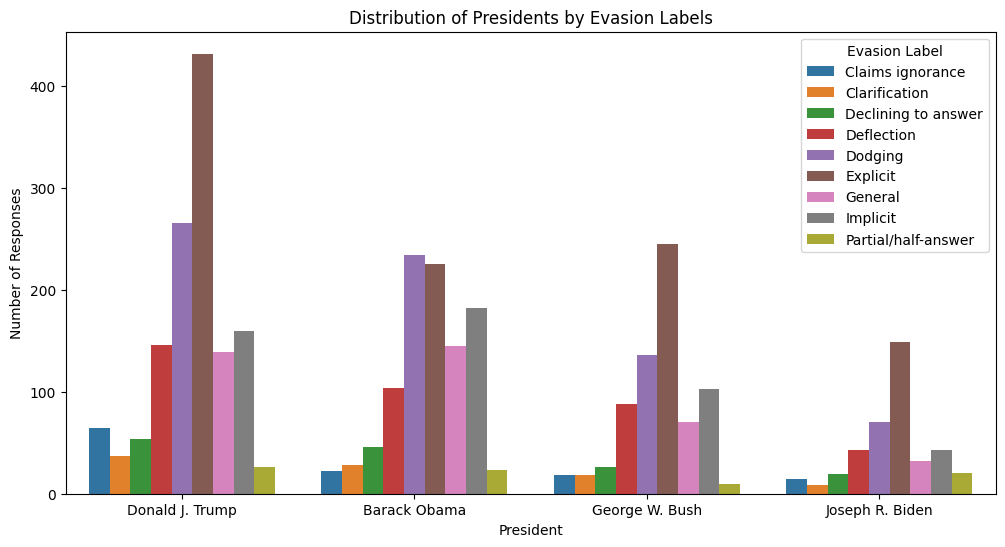

In [88]:
# answer type by president
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='president', hue='evasion_label', order=df['president'].value_counts().index)
plt.title('Distribution of Presidents by Evasion Labels')
plt.xlabel('President')
plt.ylabel('Number of Responses')
plt.legend(title='Evasion Label')
plt.show()

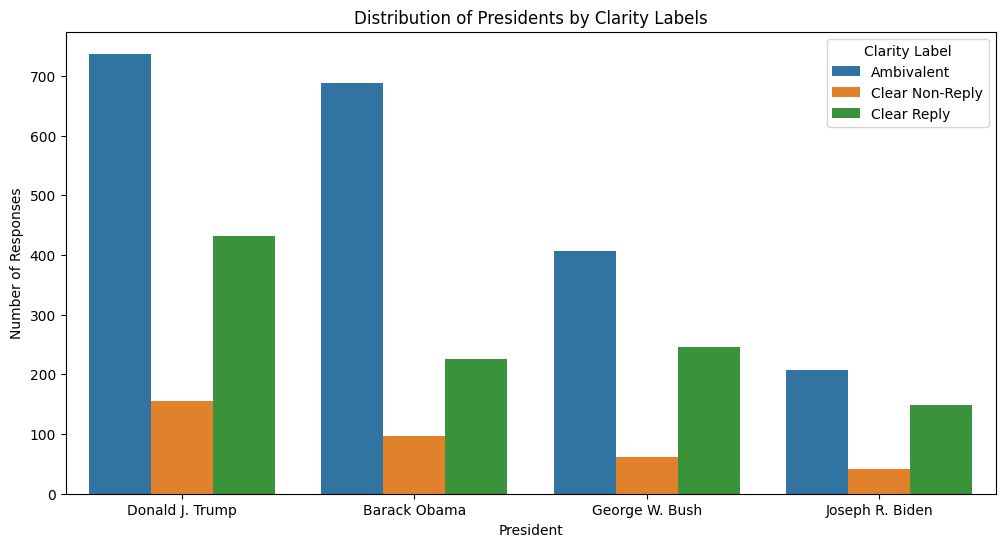

In [89]:
# clarity label by president
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='president', hue='clarity_label', order=df['president'].value_counts().index)
plt.title('Distribution of Presidents by Clarity Labels')
plt.xlabel('President')
plt.ylabel('Number of Responses')
plt.legend(title='Clarity Label')
plt.show()

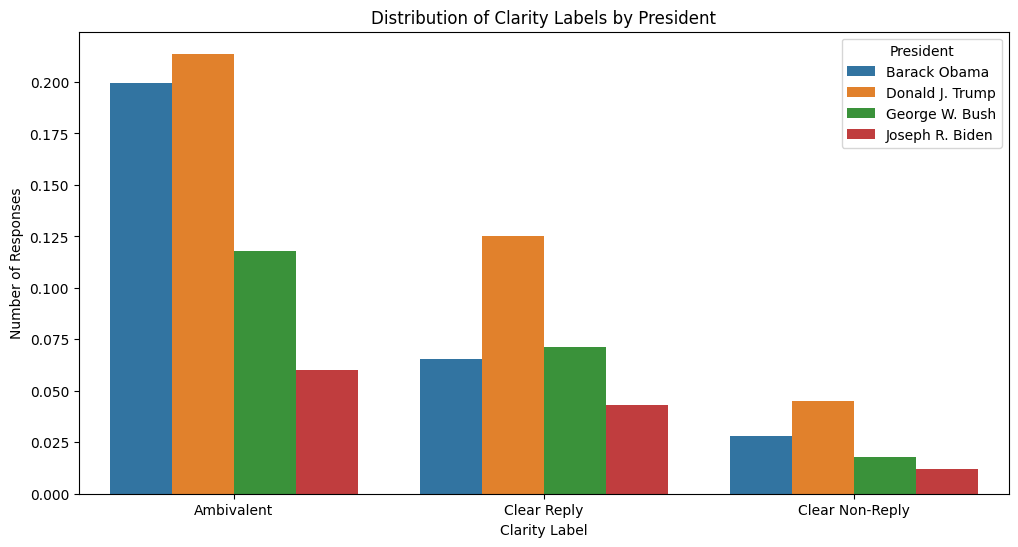

In [90]:
# president by clarity label
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='clarity_label', hue='president', order=df['clarity_label'].value_counts().index, stat='proportion')
plt.title('Distribution of Clarity Labels by President')
plt.xlabel('Clarity Label')
plt.ylabel('Number of Responses')
plt.legend(title='President')
plt.show()


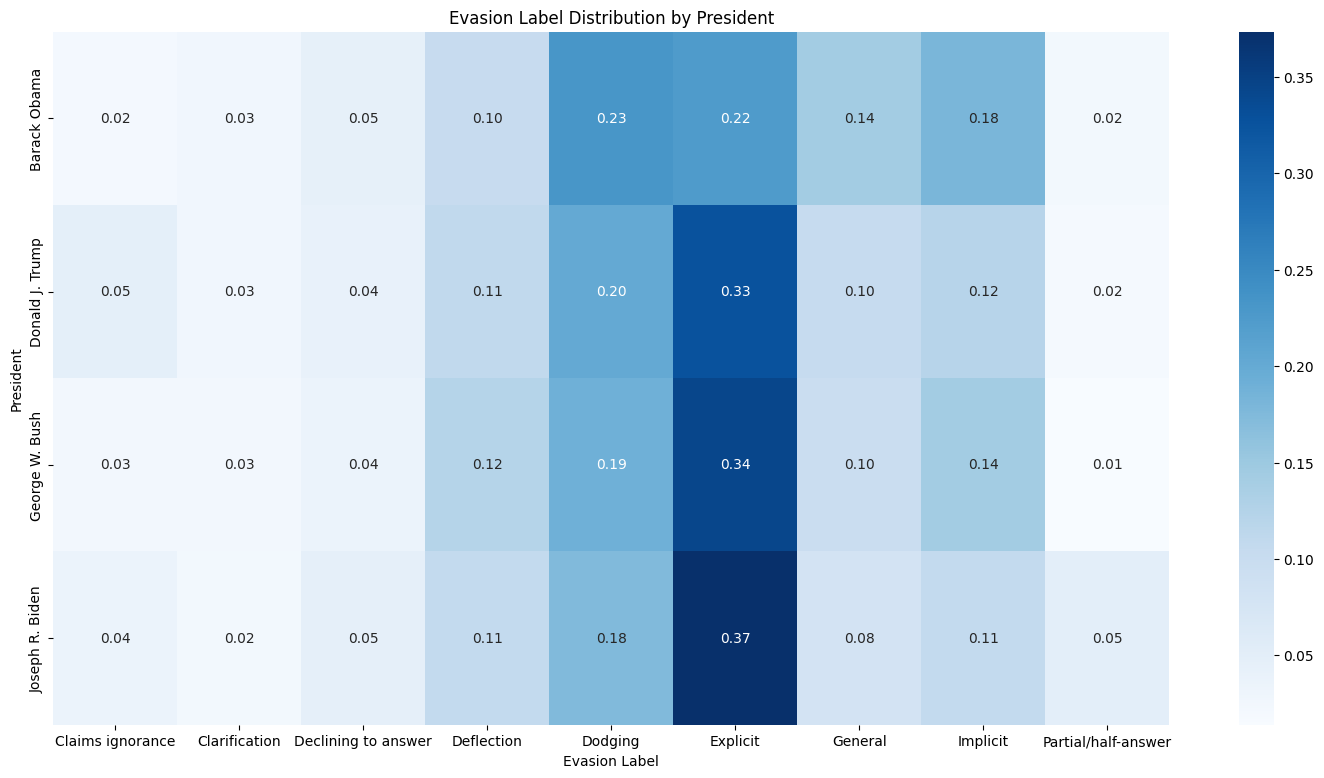

In [91]:
# evasion label heatmap
evasion_label_heatmap = pd.crosstab(df['president'], df['evasion_label'], normalize='index')
plt.figure(figsize=(18, 9))
sns.heatmap(evasion_label_heatmap, annot=True, cmap='Blues', fmt='.2f')
plt.title('Evasion Label Distribution by President')
plt.xlabel('Evasion Label')
plt.ylabel('President')
plt.show()

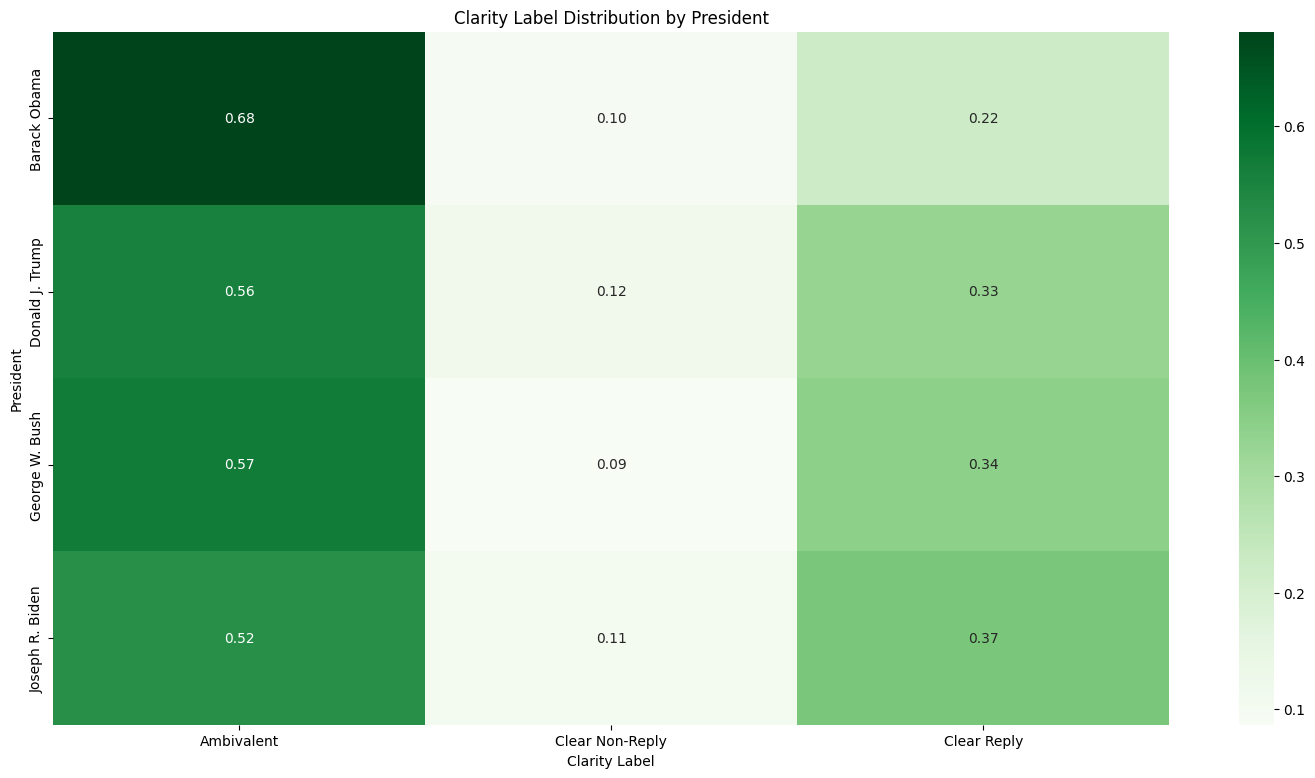

In [92]:
# clarity label heatmap
clarity_label_heatmap = pd.crosstab(df['president'], df['clarity_label'], normalize='index')
plt.figure(figsize=(18, 9))
sns.heatmap(clarity_label_heatmap, annot=True, cmap='Greens', fmt='.2f')
plt.title('Clarity Label Distribution by President')
plt.xlabel('Clarity Label')
plt.ylabel('President')
plt.show()

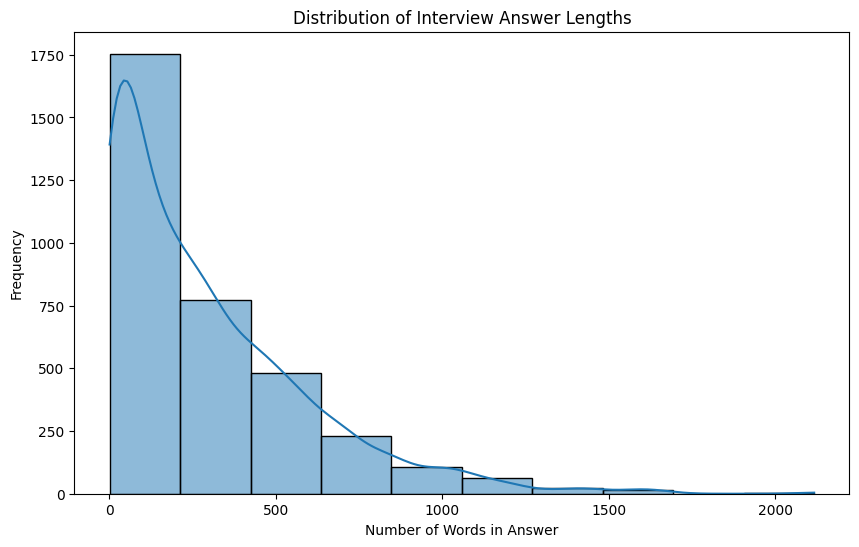

In [102]:
# question length distribution
df['question_length'] = df['interview_question'].str.split().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['answer_length'], bins=10, kde=True)
plt.title('Distribution of Interview Answer Lengths')
plt.xlabel('Number of Words in Answer')
plt.ylabel('Frequency')
plt.show()

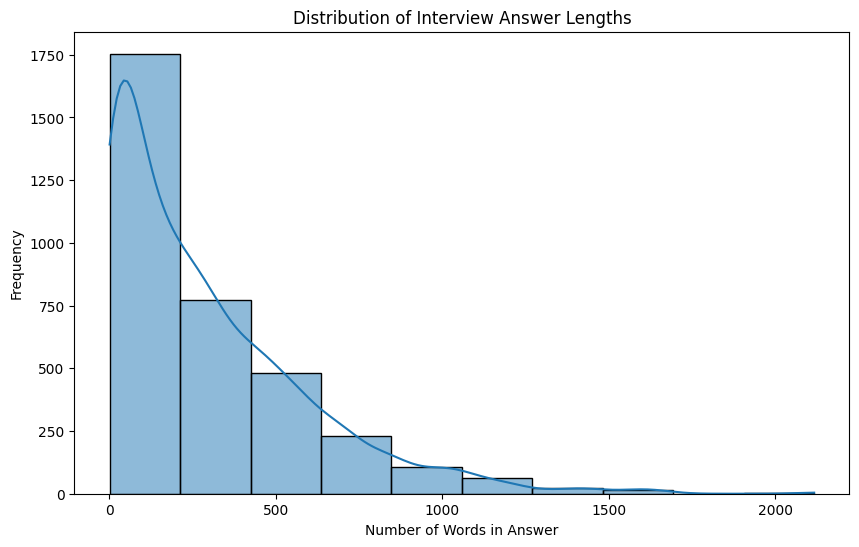

In [101]:
# answers length distribution
df['answer_length'] = df['interview_answer'].str.split().apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['answer_length'], bins=10, kde=True)
plt.title('Distribution of Interview Answer Lengths')
plt.xlabel('Number of Words in Answer')
plt.ylabel('Frequency')
plt.show()

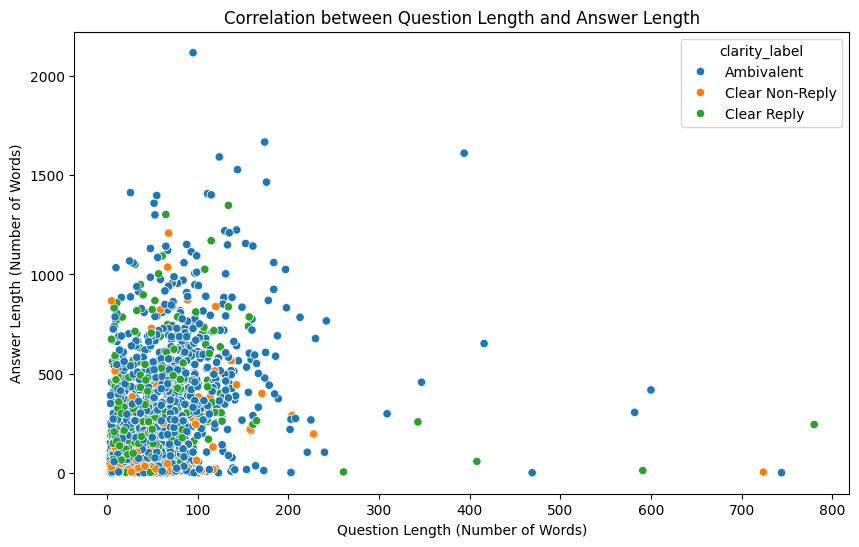

In [103]:
# question length and answer length correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='question_length', y='answer_length', hue='clarity_label')
plt.title('Correlation between Question Length and Answer Length')
plt.xlabel('Question Length (Number of Words)')
plt.ylabel('Answer Length (Number of Words)')
plt.show()